# Probability of Default Calculation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("cs-training.csv")

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
df['SeriousDlqin2yrs'] = np.where(df['SeriousDlqin2yrs'] == 0, 1, 0)
df['SeriousDlqin2yrs'].value_counts(normalize = True)

1    0.93316
0    0.06684
Name: SeriousDlqin2yrs, dtype: float64

In [7]:
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(df.columns)):
    cleancolumn.append(df.columns[i].replace('-', '').lower())
df.columns = cleancolumn

In [8]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(df['seriousdlqin2yrs'])
percentage_labels = (df['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

1    93.316
0     6.684
Name: seriousdlqin2yrs, dtype: float64

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


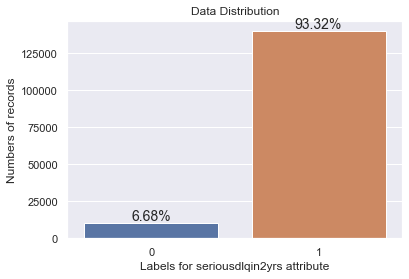

In [9]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(df.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [10]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
df.isnull().mean()

seriousdlqin2yrs                        0.000000
revolvingutilizationofunsecuredlines    0.000000
age                                     0.000000
numberoftime3059dayspastduenotworse     0.000000
debtratio                               0.000000
monthlyincome                           0.198207
numberofopencreditlinesandloans         0.000000
numberoftimes90dayslate                 0.000000
numberrealestateloansorlines            0.000000
numberoftime6089dayspastduenotworse     0.000000
numberofdependents                      0.026160
dtype: float64

In [11]:
df.shape

(150000, 11)

In [12]:
df.nunique()

seriousdlqin2yrs                             2
revolvingutilizationofunsecuredlines    125728
age                                         86
numberoftime3059dayspastduenotworse         16
debtratio                               114194
monthlyincome                            13594
numberofopencreditlinesandloans             58
numberoftimes90dayslate                     19
numberrealestateloansorlines                28
numberoftime6089dayspastduenotworse         13
numberofdependents                          13
dtype: int64

<AxesSubplot:>

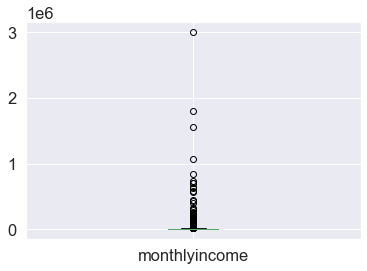

In [13]:
df['monthlyincome'].plot.box()

In [14]:
random_sam = df['monthlyincome'].dropna().sample(df['monthlyincome'].isnull().sum(), replace = True, random_state = 0)

In [15]:
random_sam

85158     3465.0
54393     4800.0
53230     8375.0
147111    6000.0
57275     6000.0
           ...  
10577     3323.0
19115     5041.0
90017     2010.0
143077    8000.0
112677    2052.0
Name: monthlyincome, Length: 29731, dtype: float64

In [16]:
random_sam.index = df[df['monthlyincome'].isnull()].index

In [17]:
df.loc[df['monthlyincome'].isnull(), 'monthlyincome'] = random_sam

In [18]:
df['numberofdependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: numberofdependents, dtype: int64

In [19]:
df1 = df[df['numberofdependents'].isnull() == True]

In [20]:
df1.shape

(3924, 11)

In [21]:
df1.groupby('seriousdlqin2yrs')['seriousdlqin2yrs'].count()/df1.shape[0]

seriousdlqin2yrs
0    0.045617
1    0.954383
Name: seriousdlqin2yrs, dtype: float64

In [22]:
df1 = df[df['numberofdependents'] == 0.0]

In [23]:
df1.shape

(86902, 11)

In [24]:
df1.groupby('seriousdlqin2yrs')['seriousdlqin2yrs'].count()/df1.shape[0]

seriousdlqin2yrs
0    0.058629
1    0.941371
Name: seriousdlqin2yrs, dtype: float64

In [25]:
df['numberofdependents'] = np.where(df['numberofdependents'].isnull(), df['numberofdependents'].mode(), df['numberofdependents'])

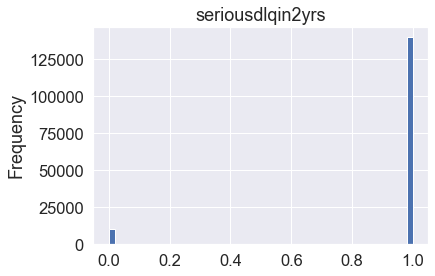

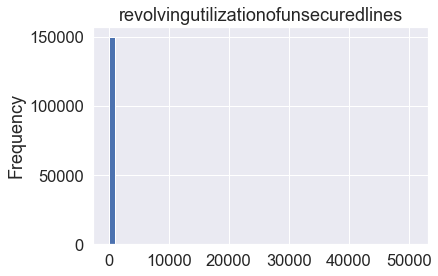

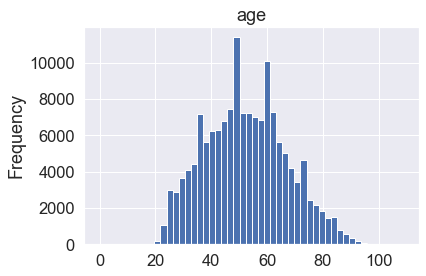

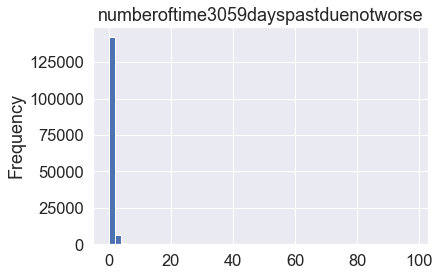

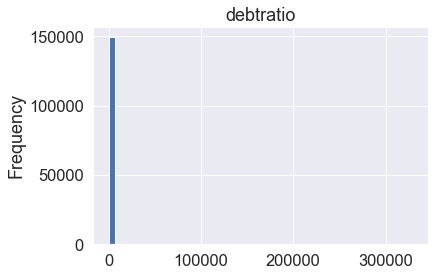

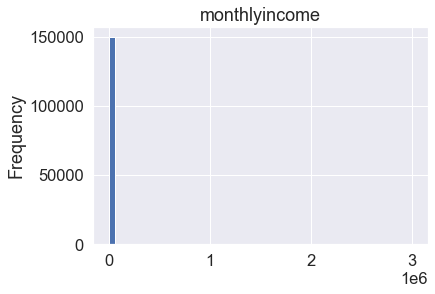

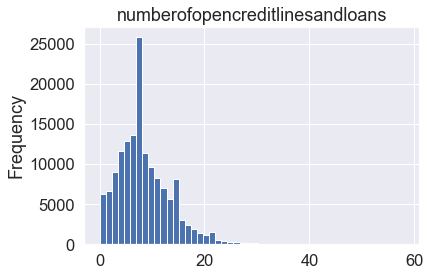

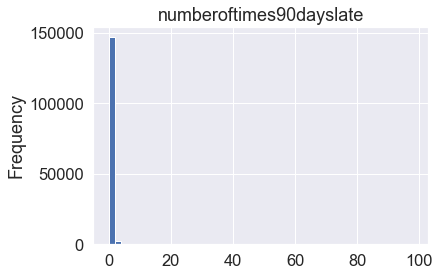

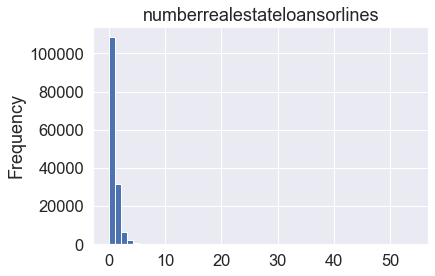

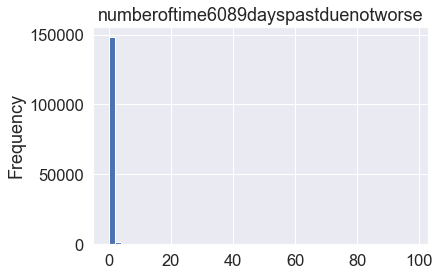

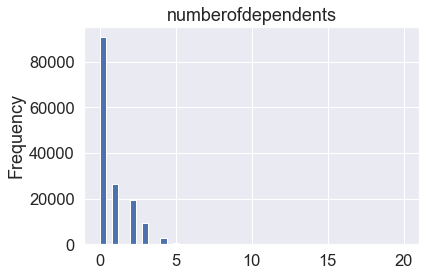

In [26]:
for col in df.columns:
    df[col].plot.hist(bins = 50)
    plt.title(col)
    plt.show()

In [27]:
corr = df.corr(method = 'pearson')

<AxesSubplot:>

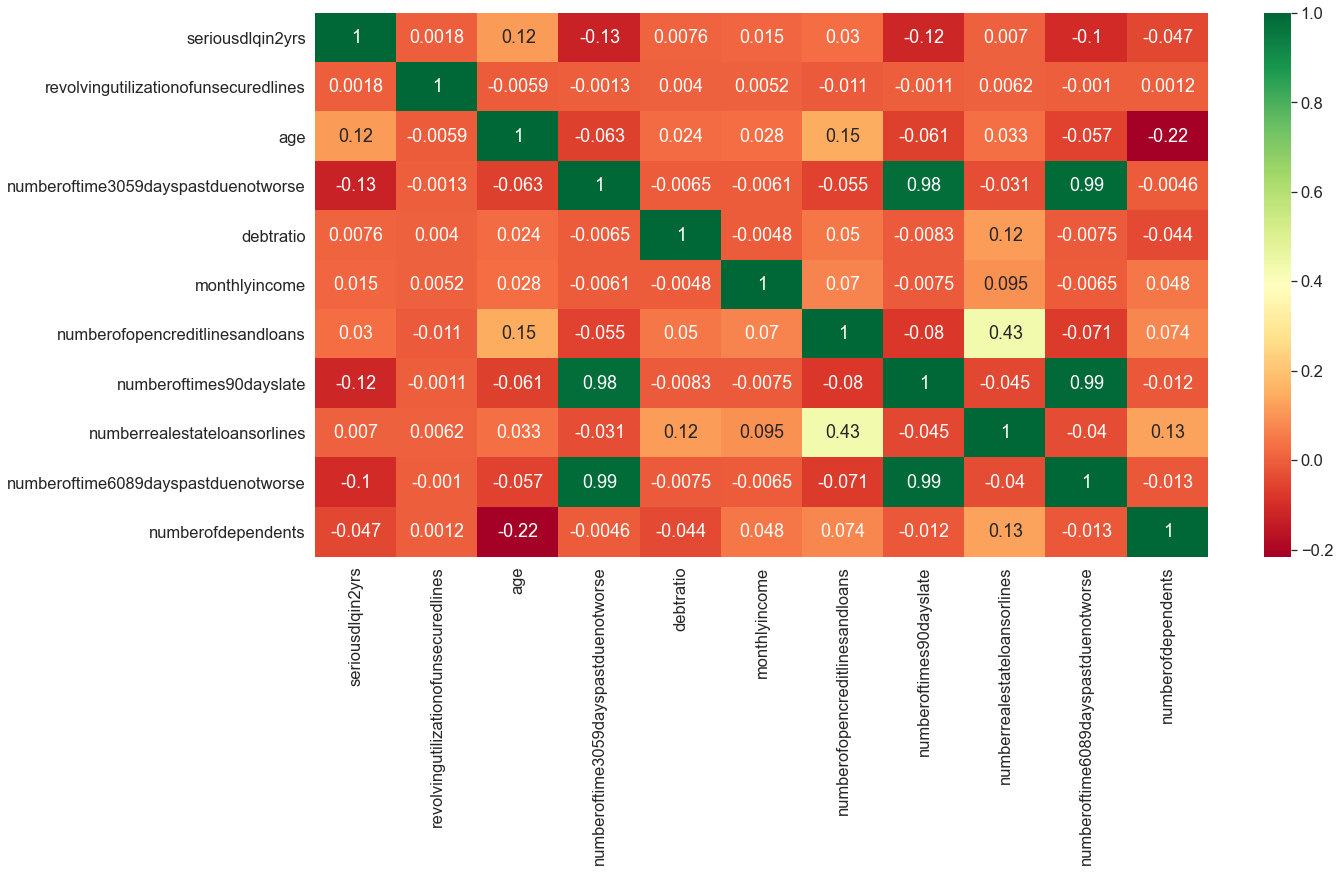

In [28]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = "RdYlGn", annot = True)

In [29]:
def correlation(data, threshold):
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if i != j:
                if abs(corr_mat.iloc[i,j]) >= threshold and corr_mat.columns[j] not in col_corr:
                    col_name = corr_mat.columns[i]
                    col_corr.add(col_name)
                
    return col_corr

In [30]:
columns_del = correlation(df, 0.8)

In [31]:
columns_del

{'numberoftime6089dayspastduenotworse', 'numberoftimes90dayslate'}

In [32]:
df['numberoftime6089dayspastduenotworse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
9          1
11         1
Name: numberoftime6089dayspastduenotworse, dtype: int64

In [33]:
df['numberoftimes90dayslate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: numberoftimes90dayslate, dtype: int64

In [34]:
df['numberoftime3059dayspastduenotworse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
11         1
13         1
Name: numberoftime3059dayspastduenotworse, dtype: int64

In [35]:
df.drop(columns_del, axis = 1, inplace = True)

In [36]:
df.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberrealestateloansorlines,numberofdependents
0,0,0.766127,45,2,0.802982,9120.0,13,6,2.0
1,1,0.957151,40,0,0.121876,2600.0,4,0,1.0
2,1,0.658180,38,1,0.085113,3042.0,2,0,0.0
3,1,0.233810,30,0,0.036050,3300.0,5,0,0.0
4,1,0.907239,49,1,0.024926,63588.0,7,1,0.0


In [37]:
df.shape

(150000, 9)

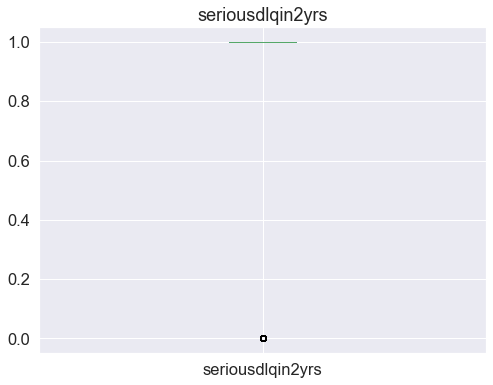

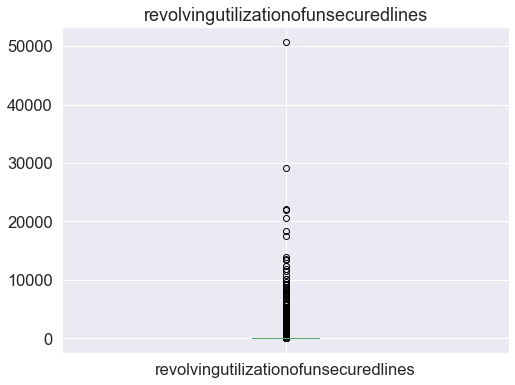

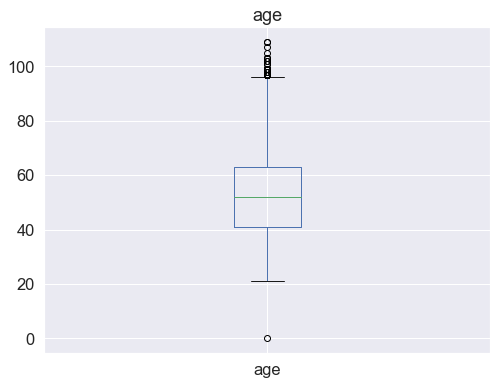

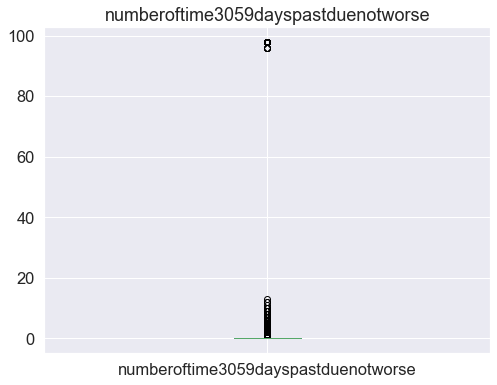

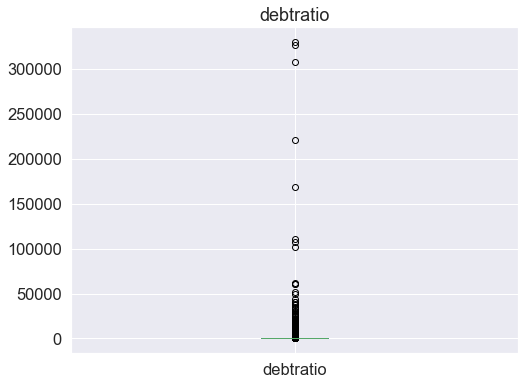

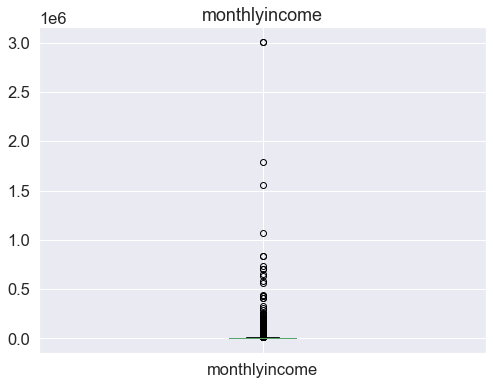

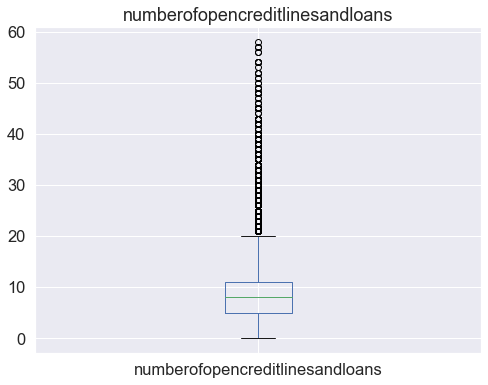

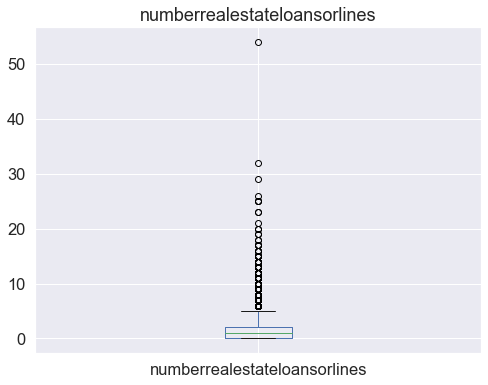

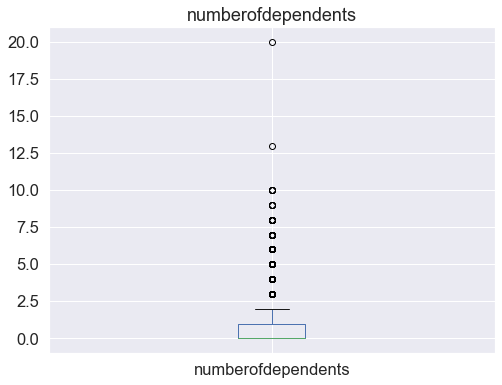

In [38]:
for col in df.columns:
    plt.figure(figsize = (8,6))
    df[col].plot.box()
    plt.title(col)
    plt.show()

In [39]:
for col in df.columns:
    print(col, df[col].skew())

seriousdlqin2yrs -3.4688570716991483
revolvingutilizationofunsecuredlines 97.63157448571562
age 0.18899454512676198
numberoftime3059dayspastduenotworse 22.597107559201046
debtratio 95.15779286552785
monthlyincome 122.33081651345235
numberofopencreditlinesandloans 1.2153137802048144
numberrealestateloansorlines 3.482483993516935
numberofdependents 1.6260587679259588


In [40]:
from sklearn.preprocessing import PowerTransformer

In [41]:
pt = PowerTransformer()

In [42]:
import scipy.stats as stats

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


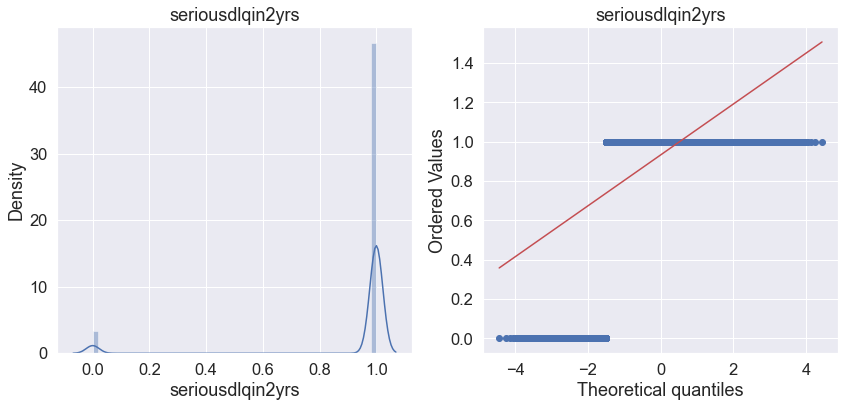

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


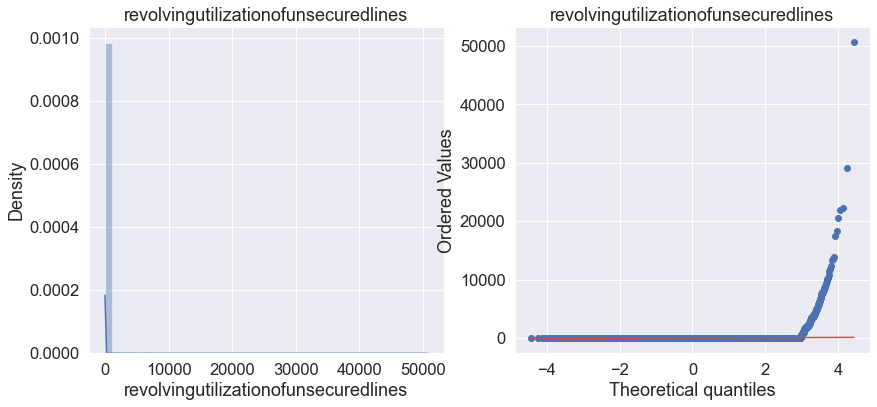

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


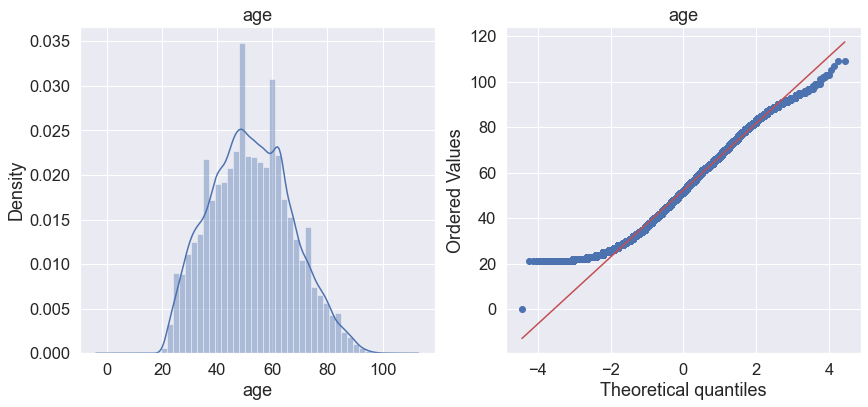

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


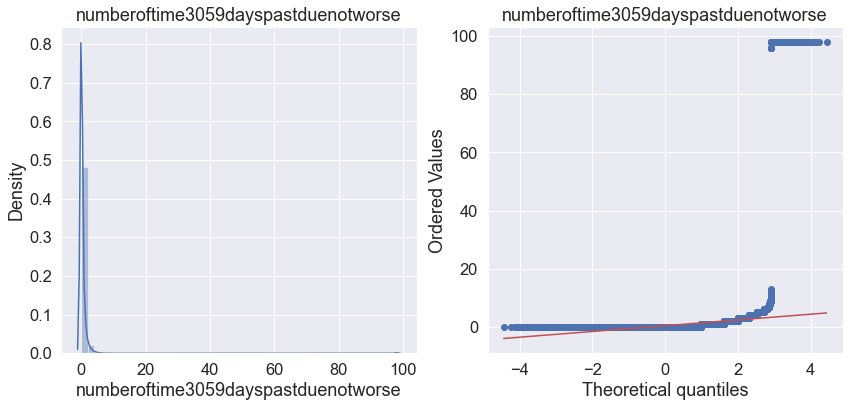

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


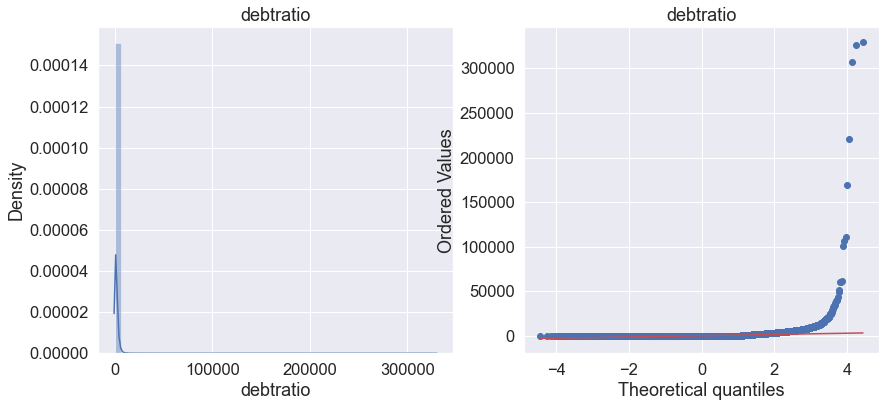

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


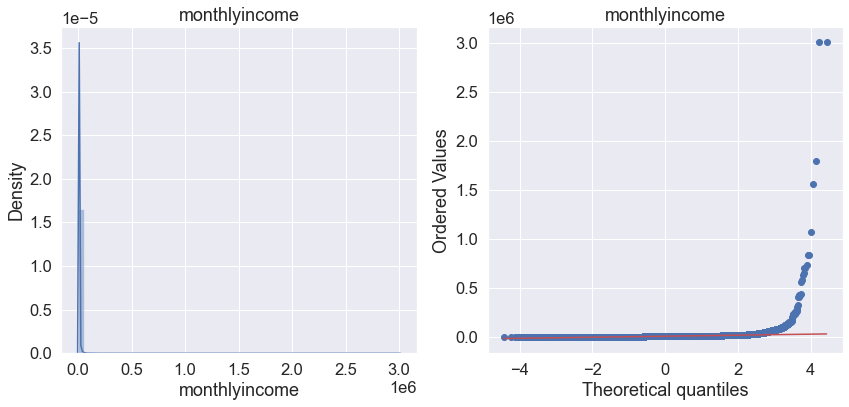

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


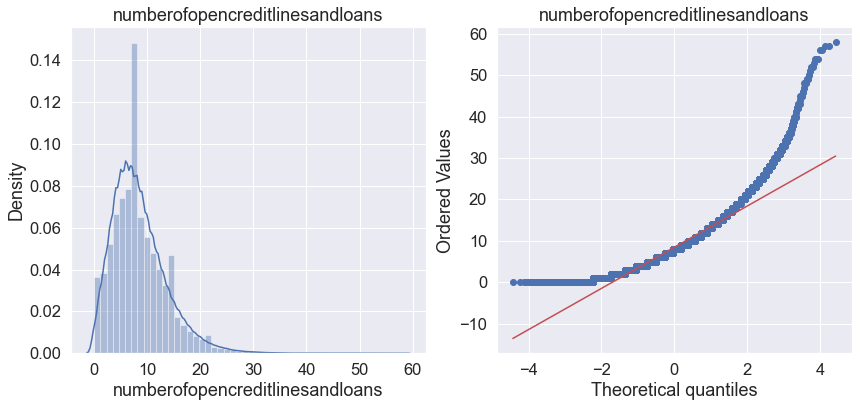

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


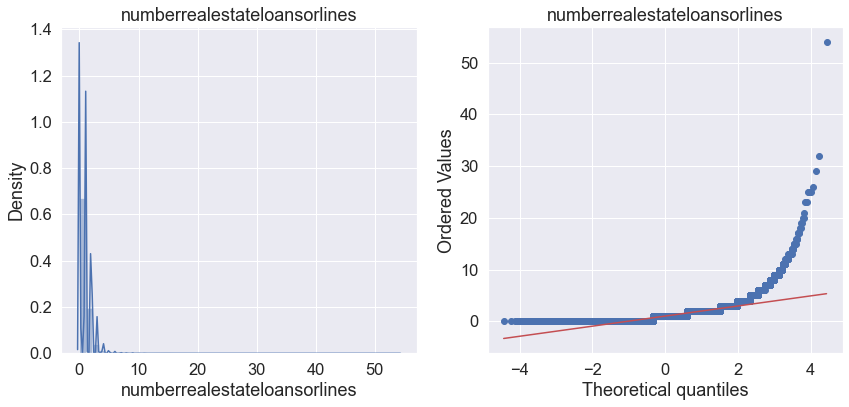

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


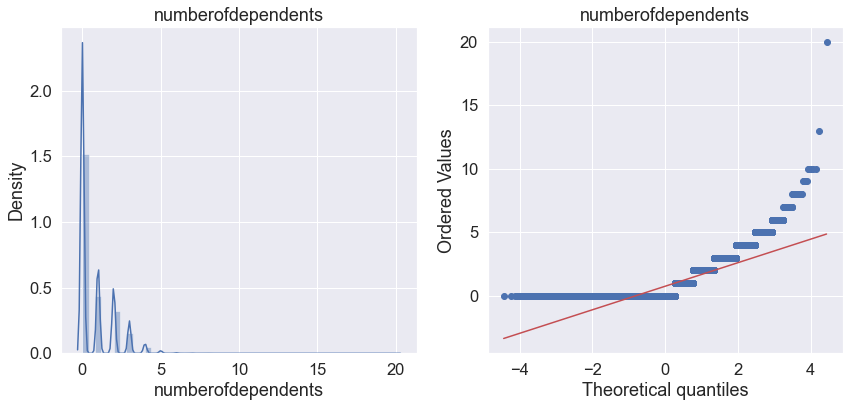

In [43]:
for col in df.columns:
    plt.figure(figsize = (14,6))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col], dist = 'norm', plot = plt)
    plt.title(col)
    plt.show()

In [44]:
df1 = df.copy()
df1.drop(['seriousdlqin2yrs','numberoftime3059dayspastduenotworse'], axis = 1, inplace = True)
df1.head()
col = df1.columns

In [45]:
dummy = pd.DataFrame(pd.get_dummies(df['numberoftime3059dayspastduenotworse'],prefix='numtime3059due',prefix_sep=':', drop_first = True))

In [46]:
dummy.head()

,numtime3059due:1,numtime3059due:2,numtime3059due:3,numtime3059due:4,numtime3059due:5,numtime3059due:6,numtime3059due:7,numtime3059due:8,numtime3059due:9,numtime3059due:10,numtime3059due:11,numtime3059due:12,numtime3059due:13,numtime3059due:96,numtime3059due:98
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
df['numberofdependents'] = np.where(df['numberofdependents'] > 4.0, 5.0, df['numberofdependents'])
df['numberofdependents'].value_counts()

0.0    90826
1.0    26316
2.0    19522
3.0     9483
4.0     2862
5.0      991
Name: numberofdependents, dtype: int64

In [48]:
dummy1 = pd.DataFrame(pd.get_dummies(df['numberofdependents'],prefix='dependents',prefix_sep=':', drop_first = True))
dummy1.head()

,dependents:1.0,dependents:2.0,dependents:3.0,dependents:4.0,dependents:5.0
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [49]:
df1 = pd.DataFrame(pt.fit_transform(df1))

In [50]:
df1.columns = col

In [51]:
df1.head()

,revolvingutilizationofunsecuredlines,age,debtratio,monthlyincome,numberofopencreditlinesandloans,numberrealestateloansorlines,numberofdependents
0,1.299993,-0.451146,0.001749,0.697508,0.950011,2.402864,1.363833
1,1.507488,-0.812700,-0.733645,-0.799335,-0.872653,-1.181182,0.938345
2,1.148383,-0.961786,-0.794450,-0.645304,-1.552290,-1.181182,-0.795834
3,0.094406,-1.588567,-0.881137,-0.562120,-0.597715,-1.181182,-0.795834
4,1.459452,-0.172148,-0.901745,4.741896,-0.124909,0.299496,-0.795834


C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


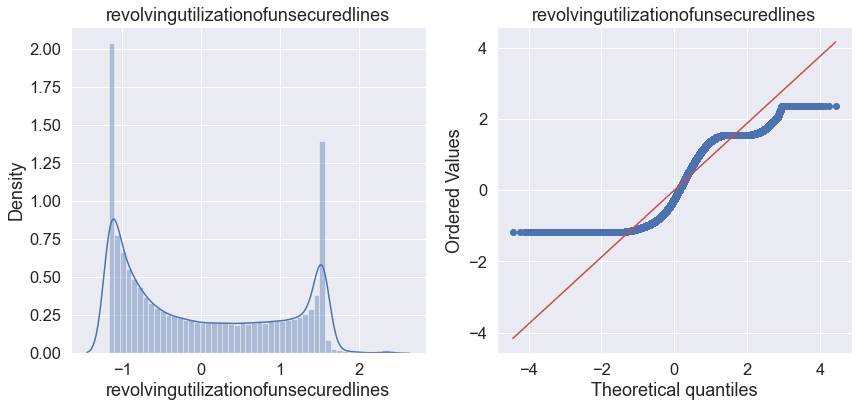

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


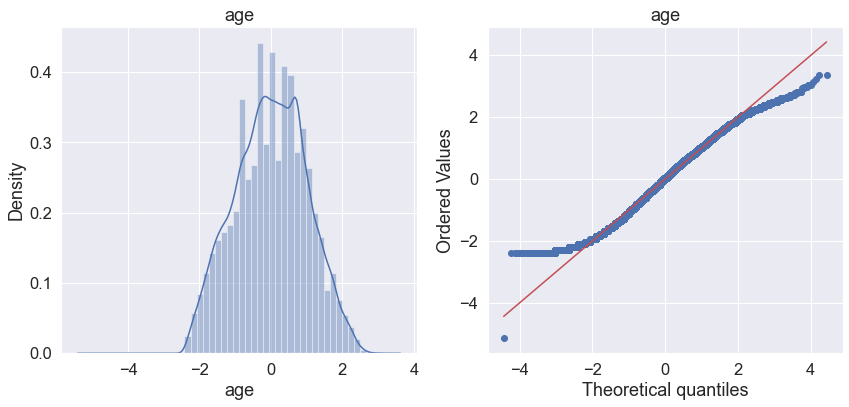

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


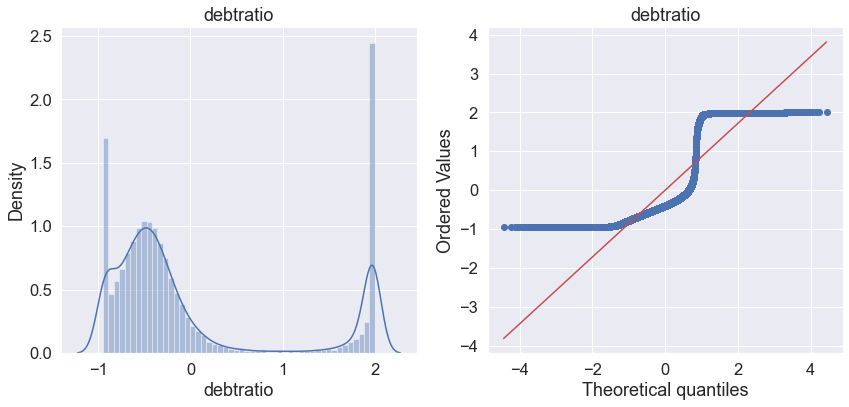

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


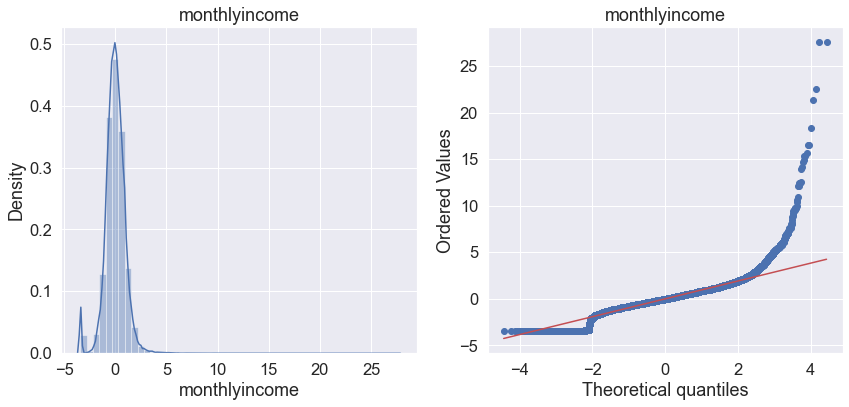

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


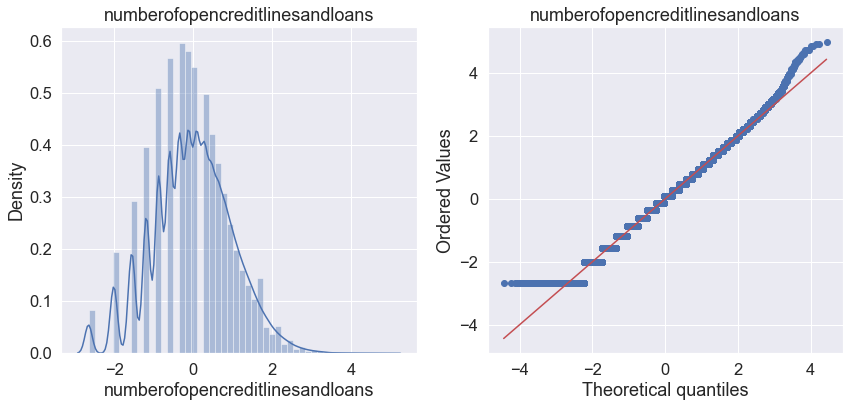

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


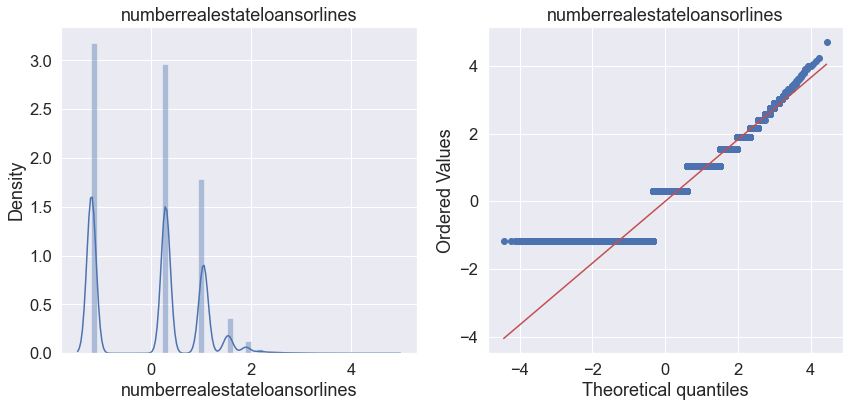

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


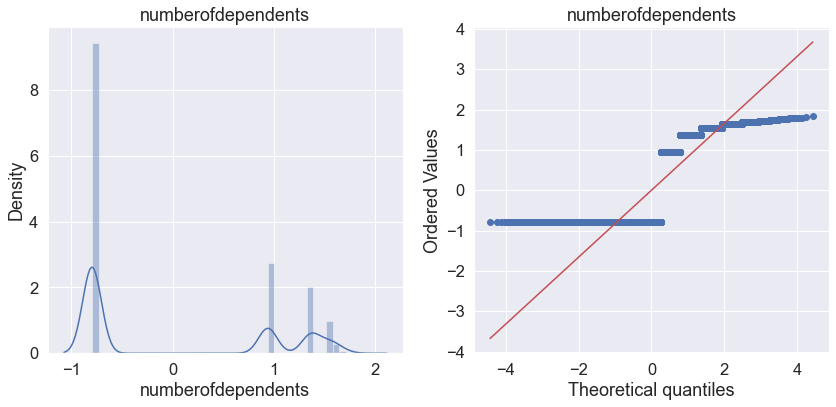

In [52]:
for col in df1.columns:
    plt.figure(figsize = (14,6))
    plt.subplot(121)
    sns.distplot(df1[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df1[col], dist = 'norm', plot = plt)
    plt.title(col)
    plt.show()

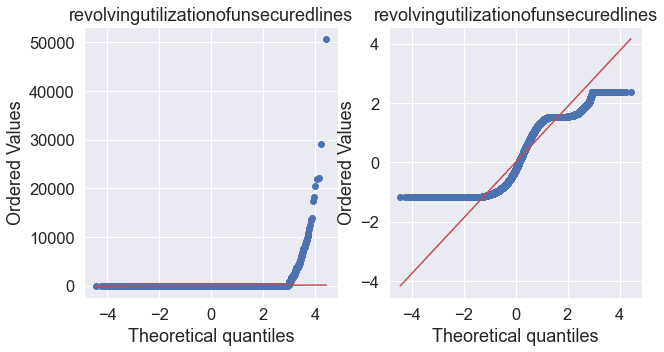

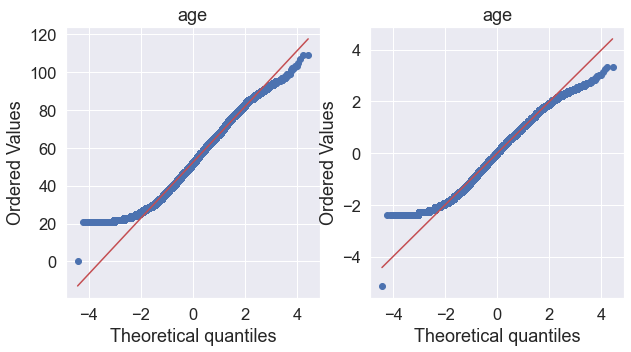

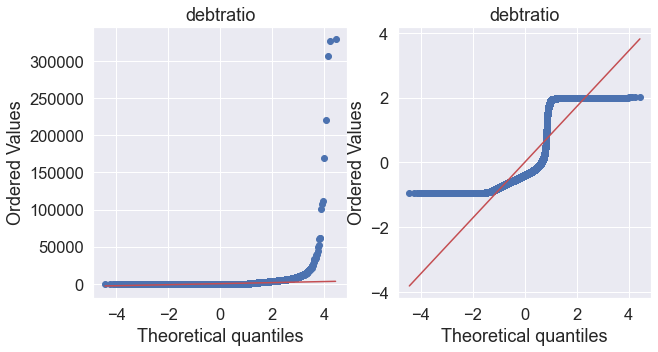

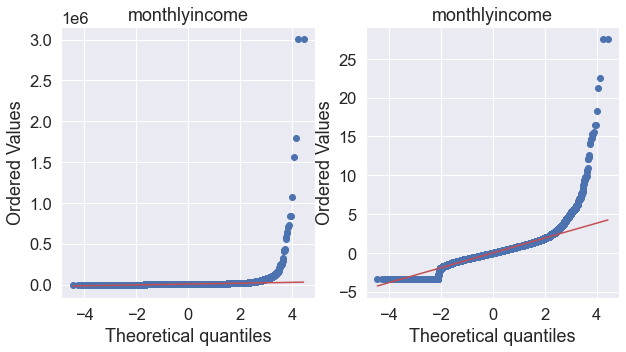

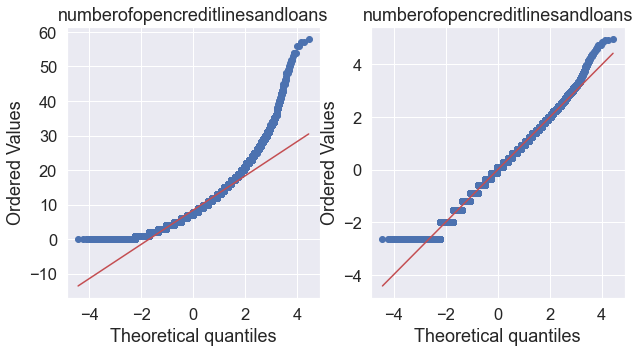

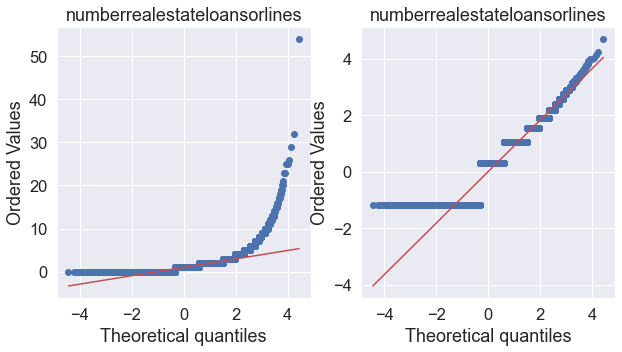

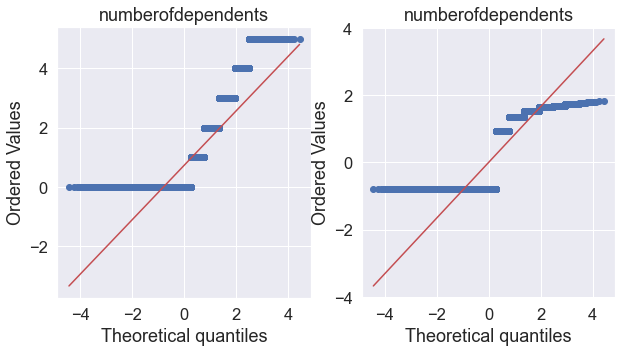

In [53]:
for col in df1.columns:
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    stats.probplot(df[col], dist = 'norm', plot = plt)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df1[col], dist = 'norm', plot = plt)
    plt.title(col)
    plt.show()

In [54]:
def outlier_count(df, col):
    per_25 = df[col].quantile(0.25)
    per_75 = df[col].quantile(0.75)
    iqr = per_75 - per_25
    upper = per_75 + (1.5 * iqr)
    lower = per_25 - (1.5 * iqr)
    print(col, df[(df[col]<lower) | (df[col]>upper)].shape[0])

In [55]:
df1.columns

Index(['revolvingutilizationofunsecuredlines', 'age', 'debtratio',
       'monthlyincome', 'numberofopencreditlinesandloans',
       'numberrealestateloansorlines', 'numberofdependents'],
      dtype='object')

In [56]:
for c in df1.columns:
    outlier_count(df, c)

revolvingutilizationofunsecuredlines 763
age 46
debtratio 31311
monthlyincome 6131
numberofopencreditlinesandloans 3980
numberrealestateloansorlines 793
numberofdependents 13336


In [57]:
for c in df1.columns:
    outlier_count(df1, c)

revolvingutilizationofunsecuredlines 0
age 11
debtratio 29790
monthlyincome 5314
numberofopencreditlinesandloans 3027
numberrealestateloansorlines 1
numberofdependents 0


In [58]:
column = ['age', 'monthlyincome', 'numberofopencreditlinesandloans', 'numberrealestateloansorlines']

In [59]:
for col in column:
    per_25 = df1[col].quantile(0.25)
    per_75 = df1[col].quantile(0.75)
    iqr = per_75 - per_25
    upper = per_75 + (1.5 * iqr)
    lower = per_25 - (1.5 * iqr)
    df1[col] = np.where(df1[col] > upper, upper,
                           np.where(df1[col] < lower, lower, df1[col]))

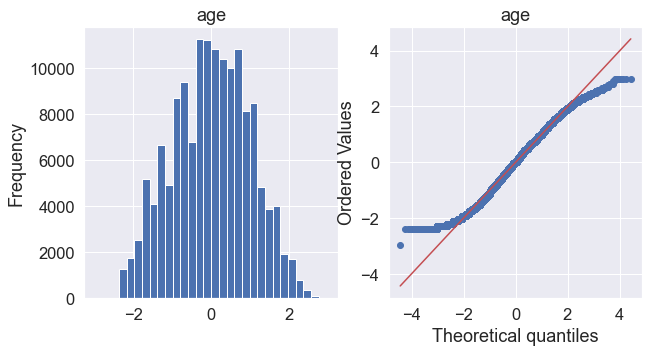

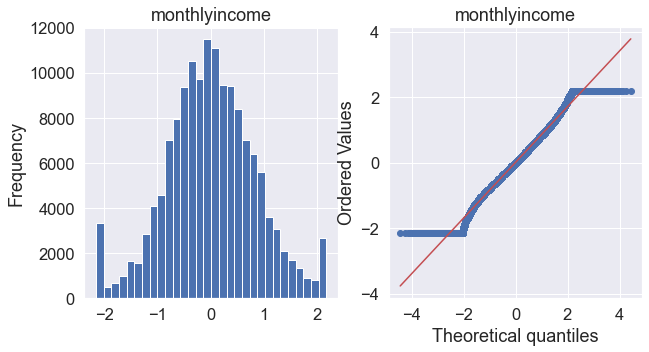

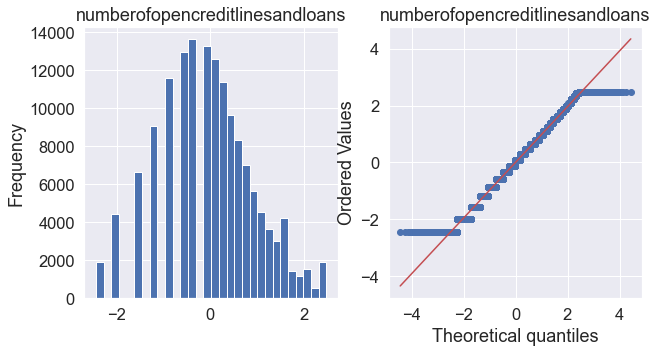

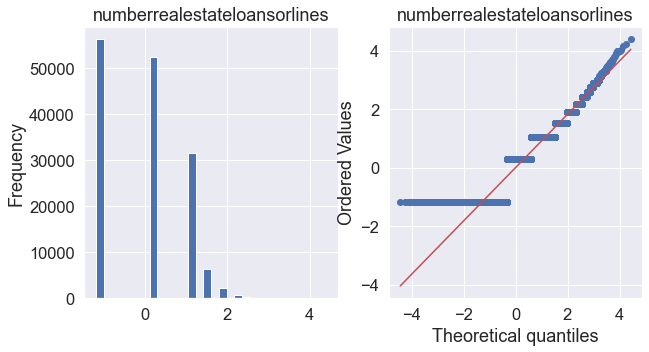

In [60]:
for col in column:
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    df1[col].plot.hist(bins = 30)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df1[col], dist = 'norm', plot = plt)
    plt.title(col)
    plt.show()

In [61]:
column = ['numberoftime3059dayspastduenotworse', 'debtratio']

In [62]:
per_25 = df['numberoftime3059dayspastduenotworse'].quantile(0.25)
per_75 = df['numberoftime3059dayspastduenotworse'].quantile(0.75)
iqr = per_75 - per_25
upper = per_75 + (1.5 * iqr)
lower = per_25 - (1.5 * iqr)
upper, lower

(0.0, 0.0)

In [63]:
df2 = df[(df['numberoftime3059dayspastduenotworse'] < lower) | df['numberoftime3059dayspastduenotworse'] > upper]

In [64]:
df2.shape

(23982, 9)

In [65]:
df2.groupby(['numberoftime3059dayspastduenotworse','seriousdlqin2yrs'])['seriousdlqin2yrs'].count()/df2.groupby('numberoftime3059dayspastduenotworse')['seriousdlqin2yrs'].count()

numberoftime3059dayspastduenotworse  seriousdlqin2yrs
1                                    0                   0.150253
                                     1                   0.849747
2                                    0                   0.265115
                                     1                   0.734885
3                                    0                   0.352338
                                     1                   0.647662
4                                    0                   0.425703
                                     1                   0.574297
5                                    0                   0.450292
                                     1                   0.549708
6                                    0                   0.528571
                                     1                   0.471429
7                                    0                   0.518519
                                     1                   0.481481
8                     

In [66]:
df.groupby(['numberoftime3059dayspastduenotworse','seriousdlqin2yrs'])['seriousdlqin2yrs'].count()/df.groupby('numberoftime3059dayspastduenotworse')['seriousdlqin2yrs'].count()

numberoftime3059dayspastduenotworse  seriousdlqin2yrs
0                                    0                   0.040002
                                     1                   0.959998
1                                    0                   0.150253
                                     1                   0.849747
2                                    0                   0.265115
                                     1                   0.734885
3                                    0                   0.352338
                                     1                   0.647662
4                                    0                   0.425703
                                     1                   0.574297
5                                    0                   0.450292
                                     1                   0.549708
6                                    0                   0.528571
                                     1                   0.471429
7                     

In [67]:
per_25 = df1['debtratio'].quantile(0.25)
per_75 = df1['debtratio'].quantile(0.75)
iqr = per_75 - per_25
upper = per_75 + (1.5 * iqr)
lower = per_25 - (1.5 * iqr)
upper, lower

(1.0973108286486526, -1.7004415950197553)

In [68]:
df2 = df1[(df1['debtratio'] < lower) | df1['debtratio'] > upper]
df2.shape

(0, 7)

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='debtratio', ylabel='Density'>

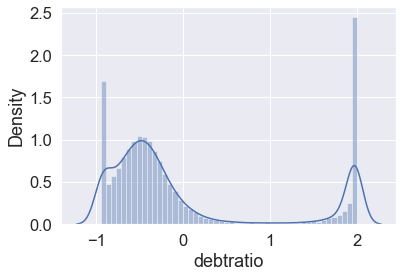

In [69]:
sns.distplot(df1['debtratio'])

C:\Users\Yogesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='debtratio', ylabel='Density'>

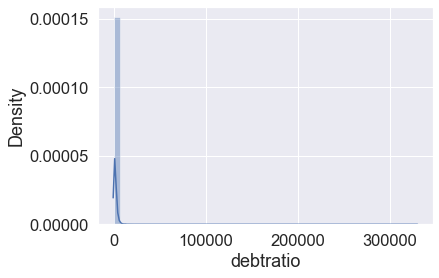

In [70]:
sns.distplot(df['debtratio'])

In [71]:
df1['target'] = df['seriousdlqin2yrs']

In [72]:
df1.head()

,revolvingutilizationofunsecuredlines,age,debtratio,monthlyincome,numberofopencreditlinesandloans,numberrealestateloansorlines,numberofdependents,target
0,1.299993,-0.451146,0.001749,0.697508,0.950011,2.402864,1.363833,0
1,1.507488,-0.812700,-0.733645,-0.799335,-0.872653,-1.181182,0.938345,1
2,1.148383,-0.961786,-0.794450,-0.645304,-1.552290,-1.181182,-0.795834,1
3,0.094406,-1.588567,-0.881137,-0.562120,-0.597715,-1.181182,-0.795834,1
4,1.459452,-0.172148,-0.901745,2.178852,-0.124909,0.299496,-0.795834,1


In [73]:
from sklearn.feature_selection import VarianceThreshold

In [74]:
selector = VarianceThreshold(threshold = 0.01)

In [75]:
selector.fit(df1)

VarianceThreshold(threshold=0.01)

In [76]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [77]:
select_col = df1.columns[selector.get_support()]
select_col

Index(['revolvingutilizationofunsecuredlines', 'age', 'debtratio',
       'monthlyincome', 'numberofopencreditlinesandloans',
       'numberrealestateloansorlines', 'numberofdependents', 'target'],
      dtype='object')

In [78]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']+0.0000001 / (df['prop_n_bad']+0.0000001))
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [79]:
df1['numberofdependents_bin'] = pd.cut(df1['numberofdependents'], 15)
df1['numberofdependents_bin'].value_counts()
df_temp = woe_ordered_continuous(df1, 'numberofdependents_bin', df1['target'])
display(df_temp)

,numberofdependents_bin,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.798, -0.62]",90826,0.941933,0.605507,85552.0,5274.0,0.611199,0.526032,-0.492332,NaN,NaN,0.153294
1,"(-0.62, -0.445]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
2,"(-0.445, -0.27]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
3,"(-0.27, -0.0943]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
4,"(-0.0943, 0.0811]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
5,"(0.0811, 0.256]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
6,"(0.256, 0.432]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
7,"(0.432, 0.607]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
8,"(0.607, 0.783]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153294
9,"(0.783, 0.958]",26316,0.926471,0.175440,24381.0,1935.0,0.174182,0.192998,-1.747650,NaN,NaN,0.153294


In [80]:
df1['numberrealestateloansorlines_bin'] = pd.cut(df1['numberrealestateloansorlines'], 15)
df1['numberrealestateloansorlines_bin'].value_counts()
df_temp = woe_ordered_continuous(df1, 'numberrealestateloansorlines_bin', df1['target'])
display(df_temp)

,numberrealestateloansorlines_bin,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.187, -0.809]",56188,0.916851,0.374587,51516.0,4672.0,0.368040,0.465988,-0.999564,NaN,NaN,0.059499
1,"(-0.809, -0.436]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059499
2,"(-0.436, -0.0637]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059499
3,"(-0.0637, 0.309]",52338,0.947495,0.348920,49590.0,2748.0,0.354280,0.274087,-1.037666,NaN,NaN,0.059499
4,"(0.309, 0.681]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059499
5,"(0.681, 1.054]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059499
6,"(1.054, 1.426]",31522,0.944007,0.210147,29757.0,1765.0,0.212589,0.176042,-1.548390,NaN,NaN,0.059499
7,"(1.426, 1.799]",6300,0.933016,0.042000,5878.0,422.0,0.041994,0.042091,-3.170184,0.010991,1.621794,0.059499
8,"(1.799, 2.171]",2170,0.910599,0.014467,1976.0,194.0,0.014117,0.019350,-4.260016,0.022417,1.089833,0.059499
9,"(2.171, 2.544]",1009,0.870168,0.006727,878.0,131.0,0.006273,0.013066,-5.070346,0.040431,0.810330,0.059499


In [81]:
df1['numberofopencreditlinesandloans_bin'] = pd.cut(df1['numberofopencreditlinesandloans'], 15)
df1['numberofopencreditlinesandloans_bin'].value_counts()
df_temp = woe_ordered_continuous(df1, 'numberofopencreditlinesandloans_bin', df1['target'])
display(df_temp)

,numberofopencreditlinesandloans_bin,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2.447, -2.114]",1888,0.743644,0.012587,1404.0,484.0,0.010030,0.048274,-4.601925,NaN,NaN,0.178267
1,"(-2.114, -1.786]",4438,0.868184,0.029587,3853.0,585.0,0.027527,0.058348,-3.592542,0.124540,1.009383,0.178267
2,"(-1.786, -1.458]",6666,0.908641,0.044440,6057.0,609.0,0.043272,0.060742,-3.140204,0.040457,0.452338,0.178267
3,"(-1.458, -1.13]",9058,0.924707,0.060387,8376.0,682.0,0.059840,0.068023,-2.816062,0.016067,0.324142,0.178267
4,"(-1.13, -0.803]",11609,0.935998,0.077393,10866.0,743.0,0.077629,0.074107,-2.555801,0.011290,0.260261,0.178267
5,"(-0.803, -0.475]",12931,0.936664,0.086207,12112.0,819.0,0.086530,0.081688,-2.447246,0.000666,0.108555,0.178267
6,"(-0.475, -0.147]",13614,0.944616,0.090760,12860.0,754.0,0.091874,0.075204,-2.387320,0.007952,0.059925,0.178267
7,"(-0.147, 0.181]",25807,0.947572,0.172047,24454.0,1353.0,0.174704,0.134949,-1.744659,0.002957,0.642662,0.178267
8,"(0.181, 0.509]",20979,0.940989,0.139860,19741.0,1238.0,0.141033,0.123479,-1.958753,0.006584,0.214095,0.178267
9,"(0.509, 0.837]",15326,0.940428,0.102173,14413.0,913.0,0.102969,0.091063,-2.273315,0.000561,0.314562,0.178267


In [82]:
df1['monthlyincome_bin'] = pd.cut(df1['monthlyincome'], 15)
df1['monthlyincome_bin'].value_counts()
df_temp = woe_ordered_continuous(df1, 'monthlyincome_bin', df1['target'])
display(df_temp)

,monthlyincome_bin,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2.161, -1.868]",3827,0.954272,0.025513,3652.0,175.0,0.026091,0.017455,-3.645962,NaN,NaN,-0.022723
1,"(-1.868, -1.579]",1685,0.937685,0.011233,1580.0,105.0,0.011288,0.010473,-4.483186,0.016587,0.837224,-0.022723
2,"(-1.579, -1.29]",3229,0.902137,0.021527,2913.0,316.0,0.020811,0.031518,-3.872121,0.035549,0.611066,-0.022723
3,"(-1.29, -1.001]",6981,0.910615,0.046540,6357.0,624.0,0.045416,0.062238,-3.091865,0.008478,0.780256,-0.022723
4,"(-1.001, -0.712]",11595,0.910479,0.077300,10557.0,1038.0,0.075421,0.103531,-2.584655,0.000136,0.507210,-0.022723
5,"(-0.712, -0.423]",17322,0.914906,0.115480,15848.0,1474.0,0.113221,0.147018,-2.178407,0.004427,0.406247,-0.022723
6,"(-0.423, -0.134]",20251,0.923016,0.135007,18692.0,1559.0,0.133539,0.155496,-2.013356,0.008110,0.165051,-0.022723
7,"(-0.134, 0.155]",22571,0.934296,0.150473,21088.0,1483.0,0.150657,0.147915,-1.892748,0.011280,0.120608,-0.022723
8,"(0.155, 0.445]",18883,0.941535,0.125887,17779.0,1104.0,0.127016,0.110114,-2.063432,0.007238,0.170684,-0.022723
9,"(0.445, 0.734]",15428,0.947239,0.102853,14614.0,814.0,0.104405,0.081189,-2.259465,0.005704,0.196033,-0.022723


In [83]:
df1['debtratio_bin'] = pd.cut(df1['debtratio'], 15)
df1['debtratio_bin'].value_counts()
df_temp = woe_ordered_continuous(df1, 'debtratio_bin', df1['target'])
display(df_temp)

,debtratio_bin,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.952, -0.752]",26117,0.939618,0.174113,24540.0,1577.0,0.175318,0.157291,-1.741149,NaN,NaN,0.122493
1,"(-0.752, -0.556]",24738,0.940133,0.164920,23257.0,1481.0,0.166152,0.147716,-1.794846,0.000515,0.053698,0.122493
2,"(-0.556, -0.359]",30142,0.943501,0.200947,28439.0,1703.0,0.203173,0.169858,-1.593692,0.003368,0.201154,0.122493
3,"(-0.359, -0.162]",21140,0.922375,0.140933,19499.0,1641.0,0.139304,0.163674,-1.971089,0.021126,0.377397,0.122493
4,"(-0.162, 0.0351]",9957,0.897057,0.066380,8932.0,1025.0,0.063812,0.102234,-2.751801,0.025317,0.780712,0.122493
5,"(0.0351, 0.232]",4277,0.882628,0.028513,3775.0,502.0,0.026969,0.050070,-3.612982,0.014429,0.861181,0.122493
6,"(0.232, 0.429]",1801,0.861743,0.012007,1552.0,249.0,0.011088,0.024835,-4.501549,0.020885,0.888567,0.122493
7,"(0.429, 0.626]",956,0.881799,0.006373,843.0,113.0,0.006023,0.011271,-5.110773,0.020056,0.609224,0.122493
8,"(0.626, 0.823]",591,0.908629,0.003940,537.0,54.0,0.003836,0.005386,-5.558386,0.026830,0.447613,0.122493
9,"(0.823, 1.019]",424,0.929245,0.002827,394.0,30.0,0.002815,0.002992,-5.861058,0.020616,0.302672,0.122493


In [84]:
df1['revolvingutilizationofunsecuredlines_bin'] = pd.cut(df1['revolvingutilizationofunsecuredlines'], 15)
df1['revolvingutilizationofunsecuredlines_bin'].value_counts()
df_temp = woe_ordered_continuous(df1, 'revolvingutilizationofunsecuredlines_bin', df1['target'])
display(df_temp)


,revolvingutilizationofunsecuredlines_bin,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.177, -0.937]",39503,0.981849,0.263353,38786.0,717.0,0.277094,0.071514,-1.283392,NaN,NaN,0.312746
1,"(-0.937, -0.702]",16475,0.983065,0.109833,16196.0,279.0,0.115707,0.027828,-2.156661,0.001216,0.873269,0.312746
2,"(-0.702, -0.466]",11070,0.979675,0.073800,10845.0,225.0,0.077479,0.022442,-2.557695,0.003390,0.401034,0.312746
3,"(-0.466, -0.23]",8634,0.971971,0.057560,8392.0,242.0,0.059954,0.024137,-2.814109,0.007704,0.256414,0.312746
4,"(-0.23, 0.00594]",7516,0.969399,0.050107,7286.0,230.0,0.052053,0.022940,-2.955418,0.002573,0.141310,0.312746
5,"(0.00594, 0.242]",7021,0.960974,0.046807,6747.0,274.0,0.048202,0.027329,-3.032283,0.008424,0.076865,0.312746
6,"(0.242, 0.478]",6920,0.953757,0.046133,6600.0,320.0,0.047152,0.031917,-3.054321,0.007217,0.022038,0.312746
7,"(0.478, 0.713]",7064,0.943092,0.047093,6662.0,402.0,0.047595,0.040096,-3.044985,0.010665,0.009336,0.312746
8,"(0.713, 0.949]",7314,0.926032,0.048760,6773.0,541.0,0.048388,0.053960,-3.028474,0.017059,0.016510,0.312746
9,"(0.949, 1.185]",7640,0.903403,0.050933,6902.0,738.0,0.049309,0.073609,-3.009618,0.022629,0.018856,0.312746


In [85]:
df1.columns

Index(['revolvingutilizationofunsecuredlines', 'age', 'debtratio',
       'monthlyincome', 'numberofopencreditlinesandloans',
       'numberrealestateloansorlines', 'numberofdependents', 'target',
       'numberofdependents_bin', 'numberrealestateloansorlines_bin',
       'numberofopencreditlinesandloans_bin', 'monthlyincome_bin',
       'debtratio_bin', 'revolvingutilizationofunsecuredlines_bin'],
      dtype='object')

In [86]:
cols = ['numberofdependents_bin', 'numberrealestateloansorlines_bin',
       'numberofopencreditlinesandloans_bin', 'monthlyincome_bin',
       'debtratio_bin', 'revolvingutilizationofunsecuredlines_bin']

In [87]:
df1.drop(cols, axis = 1, inplace = True)

In [88]:
df1.head()

,revolvingutilizationofunsecuredlines,age,debtratio,monthlyincome,numberofopencreditlinesandloans,numberrealestateloansorlines,numberofdependents,target
0,1.299993,-0.451146,0.001749,0.697508,0.950011,2.402864,1.363833,0
1,1.507488,-0.812700,-0.733645,-0.799335,-0.872653,-1.181182,0.938345,1
2,1.148383,-0.961786,-0.794450,-0.645304,-1.552290,-1.181182,-0.795834,1
3,0.094406,-1.588567,-0.881137,-0.562120,-0.597715,-1.181182,-0.795834,1
4,1.459452,-0.172148,-0.901745,2.178852,-0.124909,0.299496,-0.795834,1


In [89]:
from sklearn import preprocessing

In [90]:
final_df = pd.concat([df1, dummy, dummy1], axis = 1)
final_df.shape

(150000, 28)

In [91]:
x = final_df.drop('target', axis = 1)
y = final_df['target']
x.shape, y.shape
cols = x.columns

In [92]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))

In [93]:
norm_df = pd.DataFrame(scaler.fit_transform(x))

In [94]:
norm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.398308,0.846964,0.644084,1.316694,1.379464,1.282951,1.641894,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1.515623,0.725240,0.146048,0.626238,0.638182,0.000000,1.318415,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1.312589,0.675048,0.104869,0.697289,0.361772,0.000000,0.000000,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.716683,0.464031,0.046161,0.735659,0.750000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.488464,0.940893,0.032205,2.000000,0.942292,0.530026,0.000000,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
norm_df.columns = cols

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(norm_df, y, test_size = 0.2, random_state = 0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((120000, 27), (30000, 27), (120000,), (30000,))

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [99]:
reg = LogisticRegression()

In [100]:
reg.fit(xtrain, ytrain)

C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
reg.intercept_

array([3.77847835])

In [102]:
reg.coef_

array([[-1.54978454,  0.62856276, -0.06399813,  0.1915166 ,  0.02637696,
         0.0556929 , -0.09011883, -0.54738484, -0.82327561, -0.9667625 ,
        -1.12540273, -1.1833808 , -1.38241666, -1.34207875, -1.01349559,
        -0.94526496, -1.0257412 , -0.64674026, -0.59616349, -0.64425475,
        -1.16872431, -0.97836545, -0.00532002,  0.02899992,  0.00516999,
        -0.06247082, -0.0328349 ]])

In [103]:
feature_name = xtrain.columns.values

In [104]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

In [105]:
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] # Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index() # Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,3.778478
1,revolvingutilizationofunsecuredlines,-1.549785
2,age,0.628563
3,debtratio,-0.063998
4,monthlyincome,0.191517
5,numberofopencreditlinesandloans,0.026377
6,numberrealestateloansorlines,0.055693
7,numberofdependents,-0.090119
8,numtime3059due:1,-0.547385
9,numtime3059due:2,-0.823276


In [106]:
y_hat_test = reg.predict_proba(xtest)

In [107]:
y_hat_test = y_hat_test[:][:,1]
y_hat_test

array([0.98547944, 0.87932686, 0.96823552, ..., 0.98032525, 0.90075917,
       0.98969497])

In [108]:
ytest.reset_index(drop = True, inplace = True)
ytest.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int32

In [109]:
df_actual_predicted_probs = pd.concat([ytest, pd.DataFrame(y_hat_test)], axis = 1)

In [110]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [111]:
df_actual_predicted_probs.sample(50)

,loan_data_targets_test,y_hat_test_proba
22658,1,0.850996
9384,1,0.919591
24328,1,0.990094
3983,1,0.989212
15010,0,0.986831
10030,1,0.950931
424,1,0.925441
19414,1,0.941161
6424,1,0.989237
10711,1,0.984873


In [186]:
tr = 0.7
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [187]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,524,1519
1,771,27186


In [188]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


0.9236666666666666

In [189]:
from sklearn.metrics import roc_curve, roc_auc_score

In [190]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


(array([0.        , 0.        , 0.        , ..., 0.99951052, 0.99951052,
        1.        ]),
 array([0.00000000e+00, 3.57692170e-05, 9.51461173e-03, ...,
        9.99964231e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99466654, 0.99466654, 0.99324693, ..., 0.30904893, 0.27244263,
        0.25341075]))

In [191]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

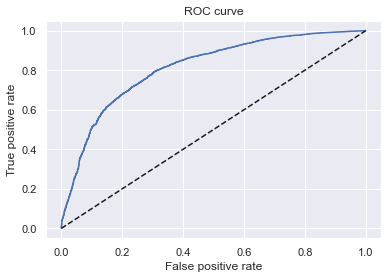

In [193]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [194]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.8127652194210356

In [195]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs['Cumulative_N_Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative_N_Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative_N_Bad'] = df_actual_predicted_probs['Cumulative_N_Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs.columns

Index(['level_0', 'index', 'loan_data_targets_test', 'y_hat_test_proba',
       'y_hat_test', 'Cumulative_N_Population', 'Cumulative_N_Good',
       'Cumulative_N_Bad', 'Cumulative_Perc_Population',
       'Cumulative_Perc_Good', 'Cumulative_Perc_Bad'],
      dtype='object')

In [196]:
df_actual_predicted_probs['Cumulative_Perc_Population'] = df_actual_predicted_probs['Cumulative_N_Population'] / (df_actual_predicted_probs.shape[0])

In [197]:
df_actual_predicted_probs['Cumulative_Perc_Good'] = df_actual_predicted_probs['Cumulative_N_Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()

In [198]:
df_actual_predicted_probs['Cumulative_Perc_Bad'] = df_actual_predicted_probs['Cumulative_N_Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [199]:
df_actual_predicted_probs.head()

,level_0,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad,Cumulative_Perc_Population,Cumulative_Perc_Good,Cumulative_Perc_Bad
0,0,0,1,0.985479,1,1,1,0,0.000033,0.000036,0.0
1,1,1,1,0.879327,1,2,2,0,0.000067,0.000072,0.0
2,2,2,1,0.968236,1,3,3,0,0.000100,0.000107,0.0
3,3,3,1,0.974963,1,4,4,0,0.000133,0.000143,0.0
4,4,4,1,0.899536,1,5,5,0,0.000167,0.000179,0.0


Text(0.5, 1.0, 'Gini')

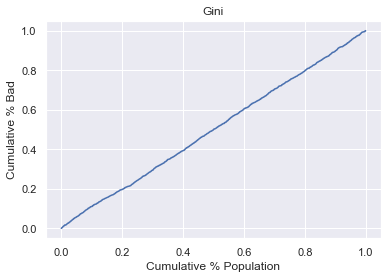

In [200]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative_Perc_Population'], df_actual_predicted_probs['Cumulative_Perc_Bad'],linestyle = '-', color = 'b')
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
#plt.plot(df_actual_predicted_probs['Cumulative_Perc_Population'], df_actual_predicted_probs['Cumulative_Perc_Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [201]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.6255304388420713

In [202]:
KS = max(df_actual_predicted_probs['Cumulative_Perc_Bad'] - df_actual_predicted_probs['Cumulative_Perc_Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.014952110480974112